# generating primes from primes

In [39]:
import numpy as np
from sys import getsizeof
import matplotlib.pyplot as plt
from matplotlib import cm

import pt_utils

def binary_to_power(bin_num, power=2):
    # BEWARE: MAXIMUM BIN_NUM SIZE HERE IS 12
    np_conv = pt_utils.binary_notegroup_to_numpy_array(bin_num)
    # reverse so that the array goes from low to high like the powers (and like the piano keyboard).
    np_conv = np_conv[::-1]
    return np.dot(np_conv, np.array([power**i for i in range(12)]))

# built to match the bit breakup
def power_polynomial_base(base, num_bases=8):
    return np.array([power**i for i in range(num_bases)])

def is_prime(n):
    if (n <= 1) :
        return False
    if (n <= 3) :
        return True
    if (n % 2 == 0 or n % 3 == 0) :
        return False
    i = 5
    while(i * i <= n) :
        if (n % i == 0 or n % (i + 2) == 0):
            return False
        i = i + 6
    return True

In [40]:
integers = np.linspace(0, 255, 256, dtype=np.uint8)

In [107]:
primes = np.array([i for i in integers if is_prime(i)])

array([  2,   3,   5,   7,  11,  13,  17,  19,  23,  29,  31,  37,  41,
        43,  47,  53,  59,  61,  67,  71,  73,  79,  83,  89,  97, 101,
       103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167,
       173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239,
       241, 251], dtype=uint8)

In [113]:
unpacked_integers = np.array([np.unpackbits(integer)[::-1] for integer in integers])

In [110]:
unpacked_primes = np.array([np.unpackbits(prime) for prime in primes])

In [121]:
primes_loop = [[binary_to_power(i, power=k) for i in primes] for k in primes]

In [53]:
# NO NEED TO GO THROUGH THIS AGAIN...
#primes_loop_filtered = np.array([np.array([(k, binary_to_power(i, power=k)) for i in primes if is_prime(binary_to_power(i, power=k))]) for k in primes]

In [62]:
primes_loop_filtered_np = np.array(primes_loop_filtered)

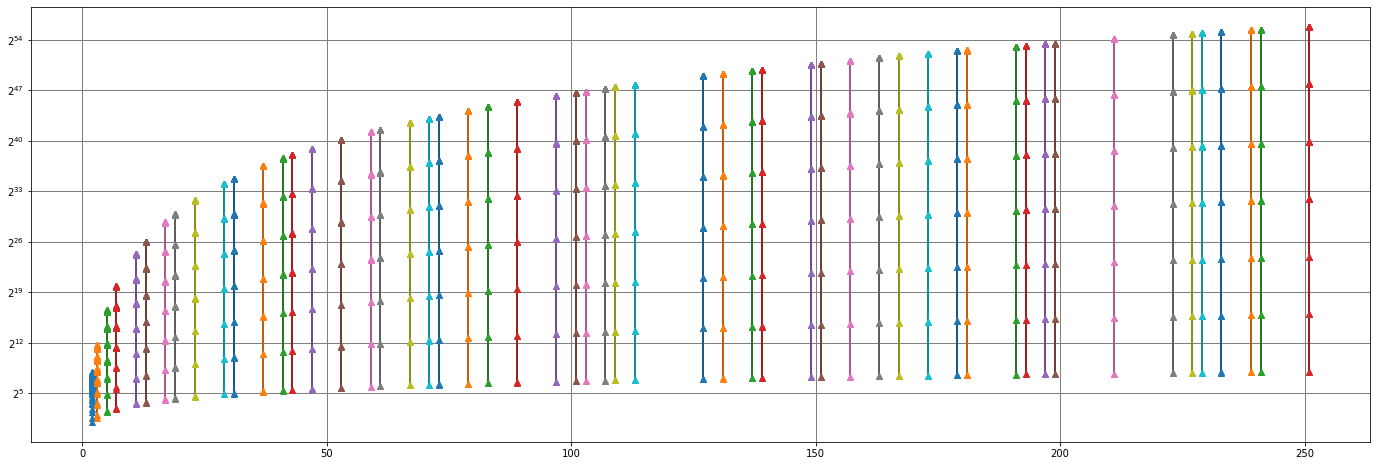

In [102]:
fig = plt.figure(figsize=(24,8))
ax = fig.add_subplot(1, 1, 1)
ax.set_yscale('log', basey=2)
ax.grid(color='gray', linestyle='-', linewidth=1)
for tuples in primes_loop:
    plt.plot(*zip(*tuples), '-^')
    plt.vlines(*zip(*tuples), tuples[0])

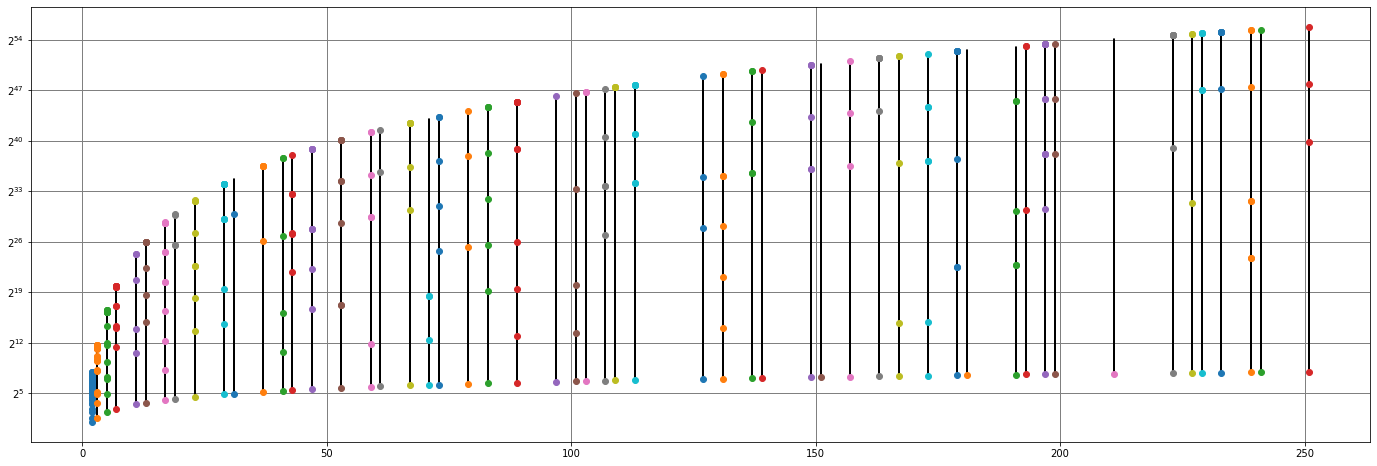

In [103]:
fig = plt.figure(figsize=(24,8))
ax = fig.add_subplot(1, 1, 1)
ax.set_yscale('log', basey=2)
ax.grid(color='gray', linestyle='-', linewidth=1)

for tuples in primes_loop:
    plt.plot(*zip(*tuples), 'k-')
    plt.vlines(*zip(*tuples), tuples[1])
for tuples in primes_loop_filtered:
     plt.plot(*zip(*tuples), 'o')